In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## naive model

### 변수 중요도

0.5621196754563894

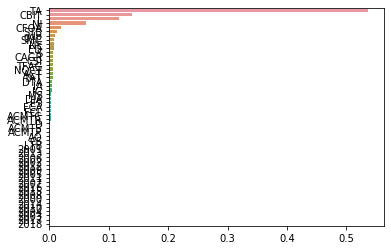

In [88]:
# 모델 생성
# RandomForestRegressor

# 2018 년도 데이터 빼기
sero_data = sero_data[:-2191]
sero_data = sero_data.drop(["2018"], axis=1)

# 모델, 데이터 준비
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 0, n_estimators=1000)
X_data = sero_data.drop(["CR","CB","CP"],axis=1)
y_data = np.array(sero_data["CR"], dtype = "int32") # target 값 데이터 변환

# train, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=0, test_size = 0.3)

# 학습
rf_model.fit(X_train, y_train)

feature_series = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(feature_series, y= feature_series.index)

# 정확도 예측
# 예측값
predicted = rf_model.predict(X_test)

# 정확도 -> 56.1%
from sklearn.metrics import accuracy_score
accuracy_score(np.round(predicted), y_test)

In [93]:
feature_series.to_csv("./feature_importance.csv", index=True)

### 제외한 후 정확도 측정

0.5616970926301555

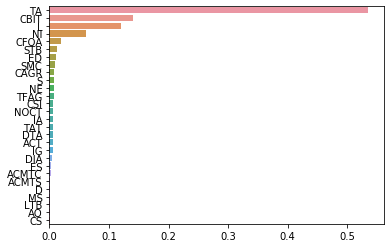

In [37]:
# 모델 생성
# RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 0, n_estimators=1000)
X_data = sero_data.drop(["CR","CB","CP","ACMTP","ACMTR","FCA","FCL"],axis=1)
y_data = np.array(sero_data["CR"], dtype = "int32") # target 값 데이터 변환

# train, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data,random_state=0, test_size = 0.3)

# 학습
rf_model.fit(X_train, y_train)

feature_series = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(feature_series, y= feature_series.index)

# 정확도 예측
# 예측값
predicted = rf_model.predict(X_test)

# 정확도 -> 56.2%
from sklearn.metrics import accuracy_score
accuracy_score(np.round(predicted), y_test)

### target 값 묶기
0(안된거), 1(D), 234(C), 567(B), 8910(A)


In [90]:
# target 값 분류 함수
def y_classification(x):
    if x==0:
        return x
    elif x==1:
        return x
    elif x>=2 and x<=4:
        return 2
    elif x>=5 and x<=7:
        return 3
    elif x>=8 and x<=10:
        return 4

0.8376436781609196

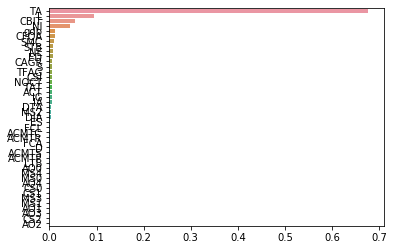

In [160]:
# 데이터 불러오기
sero_data = pd.read_csv("./data/sero_data.csv")

# 모델 생성
# RandomForestRegressor

# 2018 년도 데이터 빼기
sero_data = sero_data[:-2191]
sero_data = sero_data.drop(["2018"], axis=1)

# 모델, 데이터 준비
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 0, n_estimators=1000)
X_data = sero_data.drop(list(sero_data.columns)[33:51]+["CR","CB","CP"],axis=1)
y_data = np.array(sero_data["CR"], dtype = "int32") # target 값 데이터 변환

# target data 분류
y_class_data = np.array(list(map(y_classification, y_data)))

X_train, X_test, y_train, y_test = train_test_split(X_data, y_class_data, test_size = 0.3, random_state = 0)

from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 0, n_estimators=1000, n_jobs=-1)

# 학습
rf_model.fit(X_train, y_train)

feature_series = pd.Series(rf_model.feature_importances_, index=X_train.columns)
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(feature_series, y= feature_series.index)

# 정확도 예측
# 예측값
predicted = rf_model.predict(X_test)

# 정확도 -> 83.7 # 년도 원핫 칼럼 제외하면 83.8
from sklearn.metrics import accuracy_score
accuracy_score(np.round(predicted), y_test)